In [1]:
# Qiskit packages
import qiskit, qiskit_aer, qiskit_ibm_runtime#, qiskit_ibm_runtime, qiskit_ibm_catalog, qiskit_serverless

# Own packages
import Query as qry
import RS_prep as rsp
import General as grl
import Stabilizer_and_Graphs as sg

# Other packages
import numpy as np 
import math
import time
import matplotlib.pyplot as plt

In [2]:
# Qiskit functions
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit.quantum_info import Statevector, Clifford, Pauli, PauliList
from qiskit.circuit import Instruction
from qiskit.circuit.classical import expr
from qiskit_aer import AerSimulator
from qiskit.transpiler.passes import RemoveBarriers
from qiskit.transpiler import CouplingMap

# Other funtions
from typing import Optional
from __future__ import annotations
from IPython.display import Math
from numpy.random import default_rng
from collections import deque, Counter
from itertools import product

In [3]:
n = 3
N = 2**n

qc = QuantumCircuit(n)

# Prepare some input state psi. In this case |psi> = (|001> + |101>)/sqrt(2)
qc.x(0)
qc.x(1)
qc.h(n-1)
# qc.z(n-1)

sv = Statevector(qc)
print("input sv:")
display(Math(sv.draw("latex_source")))

rsp.apply_U_NOHE(qc, input_qubits=qc.qubits[:])
qc = grl.repackage_into_registers(qc, layout=[("K2", qc.qubits[:])])

# qc.z(3)

sv = Statevector(qc)
print("sv after U_NOHE:")
display(Math(sv.draw("latex_source")))

# qc.save_statevector(label="U_NOHE done", pershot=True)

A2, K2_clr, mapping, info, third_wires = rsp.apply_C_NOHE(qc, input_qubits=qc.qubits[:]) # removed A2_clr output for the moment

# qc.save_statevector(label="after_C_NOHE", pershot=True)

grl.apply_adaptive_part_U_NOHE_inversion(qc, input_qubits=qc.qubits[:], input_clbits=K2_clr[:], n=n)

qc.save_statevector(label="after_Z_corr", pershot=True)

K2 = qc.qubits[:N-1]
grl.apply_inverse_swaps(qc, input_qubits=K2)

qc.h(n-1)

qc.save_statevector(label="after_h_bus", pershot=True)

grl.print_qubit_table(qc)
# qc.draw("mpl", scale=0.7)

input sv:


<IPython.core.display.Math object>

sv after U_NOHE:


<IPython.core.display.Math object>

[2, 4, 1, 3]
[0, 3]
[0, 1]
qubit                                global  register  reg_idx
--------------------------------------------------------------
<Qubit register=(7, "K2"), index=0>       0  K2              0
<Qubit register=(7, "K2"), index=1>       1  K2              1
<Qubit register=(7, "K2"), index=2>       2  K2              2
<Qubit register=(7, "K2"), index=3>       3  K2              3
<Qubit register=(7, "K2"), index=4>       4  K2              4
<Qubit register=(7, "K2"), index=5>       5  K2              5
<Qubit register=(7, "K2"), index=6>       6  K2              6
<Qubit register=(8, "A2"), index=0>       7  A2              0
<Qubit register=(8, "A2"), index=1>       8  A2              1
<Qubit register=(8, "A2"), index=2>       9  A2              2
<Qubit register=(8, "A2"), index=3>      10  A2              3
<Qubit register=(8, "A2"), index=4>      11  A2              4
<Qubit register=(8, "A2"), index=5>      12  A2              5
<Qubit register=(8, "A2"), i

In [5]:
shots=20
# simulate
sim = AerSimulator(method= "statevector")
tqc = transpile(qc, backend=sim, optimization_level=0)
res = sim.run(tqc, shots=shots, memory=True).result()

print("Success:", res.success)
print("Overall status:", res.to_dict().get("status", ""))

# svs_after_C_NOHE = res.data(0)["after_C_NOHE"]
# svs_after_A0_A1_basis_change0 = res.data(0)["after_A0_A1_basis_change0"]
# svs_after_A0_A1_basis_change1 = res.data(0)["after_A0_A1_basis_change1"]
# svs_after_A0_A1_meas = res.data(0)["after_A0_A1_meas"]
svs_after_Z_corr = res.data(0)["after_Z_corr"]
svs_after_h_bus = res.data(0)["after_h_bus"]

for shot in range(shots):
    print(f"shot: {shot}")
    # print("sv after C_NOHE:")
    # display(Math(svs_after_C_NOHE[shot].draw("latex_source")))
    # print("sv after A0 A1 basis change 0:")
    # display(Math(svs_after_A0_A1_basis_change0[shot].draw("latex_source")))
    # print("sv after A0 A1 basis change 1:")
    # # display(Math(svs_after_A0_A1_basis_change1[shot].draw("latex_source")))
    # print("sv afte A0 A1 meas:")
    # display(Math(svs_after_A0_A1_meas[shot].draw("latex_source")))
    # print("sv after Z corr:")
    # display(Math(svs_after_Z_corr[shot].draw("latex_source")))
    print("sv after h bus:")
    display(Math(svs_after_h_bus[shot].draw("latex_source")))

Success: True
Overall status: COMPLETED
shot: 0
sv after h bus:


<IPython.core.display.Math object>

shot: 1
sv after h bus:


<IPython.core.display.Math object>

shot: 2
sv after h bus:


<IPython.core.display.Math object>

shot: 3
sv after h bus:


<IPython.core.display.Math object>

shot: 4
sv after h bus:


<IPython.core.display.Math object>

shot: 5
sv after h bus:


<IPython.core.display.Math object>

shot: 6
sv after h bus:


<IPython.core.display.Math object>

shot: 7
sv after h bus:


<IPython.core.display.Math object>

shot: 8
sv after h bus:


<IPython.core.display.Math object>

shot: 9
sv after h bus:


<IPython.core.display.Math object>

shot: 10
sv after h bus:


<IPython.core.display.Math object>

shot: 11
sv after h bus:


<IPython.core.display.Math object>

shot: 12
sv after h bus:


<IPython.core.display.Math object>

shot: 13
sv after h bus:


<IPython.core.display.Math object>

shot: 14
sv after h bus:


<IPython.core.display.Math object>

shot: 15
sv after h bus:


<IPython.core.display.Math object>

shot: 16
sv after h bus:


<IPython.core.display.Math object>

shot: 17
sv after h bus:


<IPython.core.display.Math object>

shot: 18
sv after h bus:


<IPython.core.display.Math object>

shot: 19
sv after h bus:


<IPython.core.display.Math object>

In [4]:
def cswap_gadget(
    qc: QuantumCircuit,
    control_qubit: Qubit,
    target_qubit1: Qubit,
    target_qubit2: Qubit
) -> None:
    """
    Implements CSWAP gadget
    """
    qc.ccx(control_qubit, target_qubit1, target_qubit2)
    qc.cx(target_qubit2, target_qubit1)

def make_U_NOHE_gate(
    n: int
) -> Gate:
    """
    Build a reusable gate implementing U_NOHE for an n-qubit input.

    The gate acts on `N-1` wires where `N = 2**n`:
      - wires `[0 .. n-1]`  → input qubits
      - wires `[n .. N-2]`  → ancillas (`N-1-n` of them)

    Args:
        n: Integer specifing the number of qubits of the input state
        
    Returns:
        Gate: A gate labeled `U_NOHE[n]` that you can append to any circuit.
    """
    
    N = 2**n
    total = N - 1

    sub = QuantumCircuit(total, name=f"U_NOHE[{N}]")
    # indices inside the subcircuit (0..total-1)
    # first n are the input, rest are ancilla's
    
    # SWAPs
    for K in range(n-1, 1, -1):
        sub.swap(K, 2**K - 1)
        
    # for K in range(2, n):  # ascending
    #     sub.swap(K, 2**K - 1)
            
    # CSWAPs
    for K in range(0, n - 1):                                     # 0 .. n-2
        for J in range(K + 1, n):                                 # K+1 .. n-1
            for alpha in range(2**K - 1, 2 * (2**K - 1) + 1):     # alpha:  (2**K - 1) .. (2*(2**K - 1))
                cswap_gadget(sub, 
                             alpha,
                             alpha + 2**J - 2**K,
                             alpha + 2**J)

    # print(sub)

    return sub#.to_gate(label=sub.name)


def apply_U_NOHE(
    qc: QuantumCircuit, 
    input_qubits: Sequence[Qubit]
) -> None:
    """
    Append U_NOHE (on the given input qubits) to `qc`, allocating the required
    ancilla qubits automatically.

    Args:
        qc: Circuit to modify (operation is appended).
        input_qubits: Ordered input qubits (length `n`). Ancillas (`2**n - 1 - n`)
            are added to a new register named `"A1"` and used as part of the gate.

    Returns:
        None. The circuit `qc` is modified in place.
    """
    
    n = len(input_qubits)
    N = 2**n
    anc_needed = N - 1 - n

    A1 = QuantumRegister(anc_needed, "A1")
    qc.add_register(A1)
    ancilla_qubits = list(A1[:])

    sub = make_U_NOHE_gate(n)
    targets = list(input_qubits) + ancilla_qubits

    qc.compose(sub, qubits=targets, inplace=True)

In [5]:
def make_BPs(
    n: int
) -> Gate:
    """
    Return a Gate that creates n Bell pairs on 2n wires: pairs (i, i+n) via H on all and CZ between halves.

    Args:
        n: Number of Bell pairs (uses 2*n qubits).

    Returns:
        Gate acting on 2*n qubits.
    """
    
    total = 2*n
    sub = QuantumCircuit(total, name=f'make_{n}_BPs')
    # First 0, ..., n-1 qubits are entangled with the last n, ..., 2*n-1 qubits

    sub.h(sub.qubits)
    sub.cz(sub.qubits[:n], sub.qubits[n:])

    return sub#.to_gate(label=sub.name)


def apply_make_BPs(
    qc: QuantumCircuit,
    input_qubits: Sequence[Qubit]
) -> None:
    """
    Append the n-pair Bell creator to `qc`, pairing the first half of `input_qubits` with the second half.

    Args:
        qc: Circuit to modify.
        input_qubits: Qubits (length 2n), paired as (i, i+n).

    Raises:
        ValueError: If `len(input_qubits)` is odd.
    """
    
    tot_num_qubits = len(input_qubits)
    if (tot_num_qubits % 2) != 0:
        raise ValueError("Total number of qubits must be even")
        
    n = int(tot_num_qubits / 2)


    sub = make_BPs(n)
    targets = list(input_qubits)

    qc.compose(sub, qubits=targets, inplace=True)


def G(
    qc: QuantumCircuit, 
    input_qubits: Sequence[Qubit], 
    anc_qubits: Sequence[Qubit], 
    clbit: Clbit
) -> None:
    """
    Deterministic gadget for C_NOHE.
    - Prepares a Bell-pair-like resource on anc_qubits (via H+CZ)
    - Applies only Clifford two-qubit gates
    - Measures the 3rd input in X basis (H then Z-measure)

    No Pauli corrections are applied here; byproducts are propagated virtually.
    """
    # make two-qubit entangled resource for the gadget
    apply_make_BPs(qc, anc_qubits[:])  # creates a pair across anc_qubits[0] / anc_qubits[1]

    # Clifford entanglers for the gadget
    qc.cx(input_qubits[-1], input_qubits[1])
    qc.cz(input_qubits[0], anc_qubits[0])
    qc.cz(input_qubits[1], anc_qubits[1])


def make_C_NOHE_circuit(
    n: int,
    target_layer: int = None,
    measure: Optional[bool] = True
) -> Tuple[QuantumCircuit, Dict[int, Tuple[int, int]], Dict[int, Dict[str, int]]]:
    """
    C_NOHE for N=2**n:
      • Lays down all gadget unitaries (Clifford only).
      • Records per-gadget metadata, including its 'layer' (layer = J), Kq0/Kq1, q2, and A2 indices.
      • Then (if measure) does X-basis SQPMs on all q2 wires (H+measure) — this is the first
        (n-1) measurement rounds, one layer at a time (ordering is preserved by the loop).

    Returns:
      sub:       the subcircuit
      mapping:   gid -> (Kq0_idx, Kq1_idx) into K2
      gadgets:   gid -> {"layer", "Kq0", "Kq1", "q2", "Aalpha", "Abeta"}
    """
    N = 2**n
    total_qubits = N - 1 + 2*(N - n - 1)
    total_clbits = 3*(N - n - 1)

    sub = QuantumCircuit(total_qubits, total_clbits, name=f"C_NOHE[{N}]")
    K2 = sub.qubits[:N-1]
    A2 = sub.qubits[N-1:]
    K2_clr = sub.clbits[:N-n-1]         # outcomes of q2 X-SQPMs
    # A2_clr = sub.clbits[N-n-1:]         # outcomes of A2 Z-SQPMs (filled in adaptive phase)

    count = 0
    mapping = {}
    third_wires = []
    info = {}
    start_gates = False
    
    for K in range(n-1, -1, -1):  # descending
        for J in range(n-1, K, -1):
            for alpha in range(2*(2**K-1), 2**K-2, -1):
                q0 = K2[alpha]
                q1 = K2[alpha + 2**J - 2**K]
                q2 = K2[alpha + 2**J]
                qubits = (q0, q1, q2)
                
                A0 = A2[2*count]
                A1 = A2[2*count+1]
                ancillas = (A0, A1)

                if count == 0:
                    layer = 0
                    gadget = 0
                    info.setdefault(layer, {})
                    info[layer][gadget] = {"qubits": qubits, "ancillas": ancillas}
                else:
                    # Check if this gadget shares any qubit with gadgets already in the current layer
                    new_layer = False
                    layer_dict = info.get(layer, {})
                    for _, gadget_dict in layer_dict.items():
                        q_prev = gadget_dict["qubits"]
                        if (q_prev[0] == q0) or (q_prev[1] == q1) or (q_prev[2] == q2):
                            new_layer = True
                            break
                
                    if new_layer:
                        layer += 1
                        gadget = 0
                        info.setdefault(layer, {})
                        info[layer][gadget] = {"qubits": qubits, "ancillas": ancillas}
                    else:
                        gadget += 1
                        info.setdefault(layer, {})  # <-- make sure dict exists
                        info[layer][gadget] = {"qubits": qubits, "ancillas": ancillas}

                # sub.save_statevector(label=f"layer: {layer}, gadget: {gadget}, count: {count}", pershot=True)

                if target_layer is None:
                    start_gates = True
                elif layer is (target_layer + 1): 
                    start_gates = True

                if start_gates:
                    G(
                        sub,
                        qubits,
                        ancillas,
                        K2_clr[count]
                    )

                third_wires.append(q2)
                mapping[count] = (alpha, alpha + 2**J - 2**K)
                
                count += 1

    # After ALL gadget unitaries: X-basis SQPMs of the collected third wires
    i = 0
    if measure:
        for layer, layer_dict in info.items():
            for g, gadget_dict in layer_dict.items(): 
                q2 = gadget_dict["qubits"][2]
                sub.h(q2)
                sub.measure(q2, K2_clr[i])
                gadget_dict["clbit"] = K2_clr[i]
                i += 1

    return sub, mapping, info
    

def apply_C_NOHE(
    qc: QuantumCircuit,
    input_qubits: Sequence[Qubit],
    measure = True
) -> Tuple[QuantumRegister, ClassicalRegister, ClassicalRegister, Dict[int, Tuple[int,int]]]:
    """
    Apply the deterministic C_NOHE to the given K2 wires (input_qubits). 
    Returns A2 (ancillas), K2_clr (X-SQPM outcomes from G), A2_clr (placeholders for adaptive phase), and 'mapping'.
    """
    N = len(input_qubits) + 1
    if N < 1 or (N & (N-1)) != 0:
        raise ValueError("N must be a power of 2")
    n = int(math.log2(N))

    num_qubits_A2 = 2*(N-n-1)
    num_clbits_A2 = num_qubits_A2
    num_clbits_K2 = (N-1-n)

    K2 = input_qubits
    A2 = QuantumRegister(num_qubits_A2, "A2")
    K2_clr = ClassicalRegister(num_clbits_K2, "K2_clr")
    # A2_clr = ClassicalRegister(num_clbits_A2, "A2_clr")
    qc.add_register(A2, K2_clr)#, A2_clr)

    count = 0
    mapping = {}
    third_wires = []
    info = {}
    
    for K in range(n-1, -1, -1):  # descending
        for J in range(n-1, K, -1):
            for alpha in range(2*(2**K-1), 2**K-2, -1):
                q0 = K2[alpha]
                q1 = K2[alpha + 2**J - 2**K]
                q2 = K2[alpha + 2**J]
                qubits = (q0, q1, q2)
                
                A0 = A2[2*count]
                A1 = A2[2*count+1]
                ancillas = (A0, A1)

                G(
                    qc,
                    qubits,
                    ancillas,
                    K2_clr[count]
                )

                third_wires.append(q2)
                mapping[count] = (alpha, alpha + 2**J - 2**K)

                if count == 0:
                    layer = 0
                    gadget = 0
                    info.setdefault(layer, {})
                    info[layer][gadget] = {"qubits": qubits, "ancillas": ancillas}
                else:
                    # Check if this gadget shares any qubit with gadgets already in the current layer
                    new_layer = False
                    layer_dict = info.get(layer, {})
                    for _, gadget_dict in layer_dict.items():
                        q_prev = gadget_dict["qubits"]
                        if (q_prev[0] == q0) or (q_prev[1] == q1) or (q_prev[2] == q2):
                            new_layer = True
                            break
                
                    if new_layer:
                        layer += 1
                        gadget = 0
                        info.setdefault(layer, {})
                        info[layer][gadget] = {"qubits": qubits, "ancillas": ancillas}
                    else:
                        gadget += 1
                        info.setdefault(layer, {})  # <-- make sure dict exists
                        info[layer][gadget] = {"qubits": qubits, "ancillas": ancillas}

                qc.save_statevector(label=f"layer: {layer}, gadget: {gadget}, count: {count}", pershot=True)
                
                count += 1

    # After ALL gadget unitaries: X-basis SQPMs of the collected third wires
    i = 0
    if measure:
        for layer, layer_dict in info.items():
            for g, gadget_dict in layer_dict.items(): 
                q2 = gadget_dict["qubits"][2]
                qc.h(q2)
                qc.measure(q2, K2_clr[i])
                gadget_dict["clbit"] = K2_clr[i]
                i += 1
    
    if qc.metadata is None:
        qc.metadata = {}
    qc.metadata[f"C_NOHE_mapping[{N}]"] = mapping
    qc.metadata[f"C_NOHE_info[{N}]"] = info
    qc.metadata[f"C_NOHE_third_wires[{N}]"] = third_wires

    return A2, K2_clr, mapping, info, third_wires#, A2_clr



In [6]:
def bits_to_int(lsb_first):
    return sum(b << i for i, b in enumerate(lsb_first))

    
def all_binary_lists(n: int):
    """Return 2^n lists (length n) with first position flipping fastest."""
    return [list(bits)[::-1] for bits in product([0, 1], repeat=n)]
        

def apply_adaptive_part_U_NOHE_inversion(
    qc: QuantumCircuit,
    input_qubits: Sequence[Qubit],
    input_clbits: Sequence[Clbit],
    n: int
) -> None:
    """
    Adaptive SQPMs for NOHE inversion:
      • Choose A2 measurement bases (X vs Z) based on prior X-measurements (K2_clr).
      • Do NOT apply Pauli corrections mid-circuit.
      • After all measurements, apply one pass of conditional Zs on the relevant K2 qubits.
    """
    N = 2**n
    mapping = qc.metadata[f"C_NOHE_mapping[{N}]"]
    info = qc.metadata[f"C_NOHE_info[{N}]"]
    third_wires = qc.metadata[f"C_NOHE_third_wires[{N}]"]

    expected_qubits = N - 1 + 2*(N - n - 1)
    expected_clbits = (N - n - 1)
    if len(input_qubits) != expected_qubits:
        raise ValueError(f"Need {expected_qubits} qubits, got {len(input_qubits)}")
    if len(input_clbits) != expected_clbits:
        raise ValueError(f"Need {expected_clbits} clbits, got {len(input_clbits)}")

    def precompute_P_outs_for_layer(n, layer, local_indices, expected_qubits):
        """ Returns a dict, where the keys are the alpha beta combs and the items are the P_outs """
         # make Clifford to propagate Pauli byproduct through
    
        C = Clifford(make_C_NOHE_circuit(n, target_layer=layer, measure=False)[0])
    
        num_outcomes = len(local_indices)
        outcome_combs = all_binary_lists(num_outcomes)
    
        d = {}
        for outcome_comb in outcome_combs:
            x = np.zeros(expected_qubits, dtype=bool)
            z = np.zeros(expected_qubits, dtype=bool)
            
            for j in range(num_outcomes):
                if outcome_comb[j] == 1:
                    loc_idx = local_indices[j]
                    z[loc_idx] = True
                    
            P_in = Pauli((z, x))
            P_out = P_in.evolve(C, frame="s")
            d[bits_to_int(outcome_comb)] = P_out
    
        return d
    
    def find_loc_bit_idx(qc, q, reg_name):
        """ Assumes q is in only 1 reg """
        reg = grl.get_qreg(qc, reg_name)
        return qc.find_bit(q).registers[-1][-1]

    K2      = list(input_qubits[:N-1])
    A2      = list(input_qubits[N-1:])
    K2_clr  = list(input_clbits[:])

    count = 0
    
    for layer, layer_dict in info.items():
        num_gadgets = len(layer_dict)
        local_indices = [] 
        A2_clr = ClassicalRegister(2 * num_gadgets, f"A2_layer_{layer}_clr")
        qc.add_register(A2_clr)
        i = 0
        
        for gadget, gadget_dict in layer_dict.items():
            q0, q1, q2 = gadget_dict["qubits"]
            A0, A1     = gadget_dict["ancillas"]
            Kc         = gadget_dict["clbit"]
            Ac0, Ac1   = A2_clr[2*i], A2_clr[2*i+1]

            # measure A0, A1 in X or Z
            with qc.if_test((Kc, 0)) as else_:
                qc.measure([A0, A1], [Ac0, Ac1])
            with else_:
                qc.h(A0)
                qc.h(A1)
                qc.measure([A0, A1], [Ac1, Ac0])   # reversed roles of alpha and beta

            local_idx_q0 = find_loc_bit_idx(qc, q0, "K2")
            local_idx_q1 = find_loc_bit_idx(qc, q1, "K2")

            local_indices.append(local_idx_q0)
            local_indices.append(local_idx_q1)

            # qc.save_statevector(label=f"adapt layer: {layer}, gadget: {gadget}, count: {count}", pershot=True)

            i += 1
            count += 1
            
        print(local_indices)
        
        # get corrections from propagated Pauli byproduct
        P_out_dict = precompute_P_outs_for_layer(n, layer, local_indices, expected_qubits)

        # rotate q2's in K2 back to Z frame before applying corrections
        for q2 in third_wires:
            qc.h(q2)

        # apply corrections
        for outcome_comb, P_out in P_out_dict.items():
            with qc.if_test((A2_clr, outcome_comb)):
                Zarr, Xarr = P_out.z, P_out.x
                for j, q in enumerate(K2):
                        if Zarr[j]:
                            qc.z(q)
                        if Xarr[j]:
                            qc.x(q)

        # measure q2's in K2 in X basis
        j = 0
        for q2 in third_wires:
            qc.h(q2)
            qc.measure(q2, K2_clr[j])
            j += 1
    
        # qc.save_statevector(label=f"adapt layer: {layer} done", pershot=True)

In [7]:
def apply_inverse_swaps(
    qc: QuantumCircuit,
    input_qubits: Sequence[Qubit]
) -> None:
    """
    Undo the SWAP layer from Eq. (9) so the recovered |ψ⟩ sits on the LSB wires.
    Forward used K = n-1..2, so inverse is K = 2..n-1.
    """
    N_minus_1 = len(input_qubits)
    N = N_minus_1 + 1
    n = int(math.log2(N))

    for K in range(2, n):   # K = 2 .. n-1
        qc.swap(input_qubits[K], input_qubits[2**K - 1])

    # for K in range(n - 1, 1, -1):  # descending
    #     qc.swap(input_qubits[K], input_qubits[2**K - 1])

In [3]:
n = 3
N = 2**n

qc = QuantumCircuit(n)

# Prepare some input state psi. In this case |psi> = (|001> + |101>)/sqrt(2)
qc.x(0)
qc.x(1)
qc.h(n-1)
# qc.z(n-1)

sv = Statevector(qc)
print("input sv:")
display(Math(sv.draw("latex_source")))

rsp.apply_U_NOHE(qc, input_qubits=qc.qubits[:])
qc = grl.repackage_into_registers(qc, layout=[("K2", qc.qubits[:])])

grl.apply_U_NOHE_inversion(qc, input_qubits=qc.qubits[:])

qc.h(n-1)

qc.save_statevector(label="after_h_bus", pershot=True)

grl.print_qubit_table(qc)
# qc.draw("mpl", scale=0.7)

input sv:


<IPython.core.display.Math object>

[2, 4, 1, 3]
[0, 3]
[0, 1]
qubit                                global  register  reg_idx
--------------------------------------------------------------
<Qubit register=(7, "K2"), index=0>       0  K2              0
<Qubit register=(7, "K2"), index=1>       1  K2              1
<Qubit register=(7, "K2"), index=2>       2  K2              2
<Qubit register=(7, "K2"), index=3>       3  K2              3
<Qubit register=(7, "K2"), index=4>       4  K2              4
<Qubit register=(7, "K2"), index=5>       5  K2              5
<Qubit register=(7, "K2"), index=6>       6  K2              6
<Qubit register=(8, "A2"), index=0>       7  A2              0
<Qubit register=(8, "A2"), index=1>       8  A2              1
<Qubit register=(8, "A2"), index=2>       9  A2              2
<Qubit register=(8, "A2"), index=3>      10  A2              3
<Qubit register=(8, "A2"), index=4>      11  A2              4
<Qubit register=(8, "A2"), index=5>      12  A2              5
<Qubit register=(8, "A2"), i

In [5]:
shots=20
# simulate
sim = AerSimulator(method= "statevector")
tqc = transpile(qc, backend=sim, optimization_level=0)
res = sim.run(tqc, shots=shots, memory=True).result()

print("Success:", res.success)
print("Overall status:", res.to_dict().get("status", ""))

# svs_after_C_NOHE = res.data(0)["after_C_NOHE"]
# svs_after_A0_A1_basis_change0 = res.data(0)["after_A0_A1_basis_change0"]
# svs_after_A0_A1_basis_change1 = res.data(0)["after_A0_A1_basis_change1"]
# svs_after_A0_A1_meas = res.data(0)["after_A0_A1_meas"]
# svs_after_Z_corr = res.data(0)["after_Z_corr"]
svs_after_h_bus = res.data(0)["after_h_bus"]

for shot in range(shots):
    print(f"shot: {shot}")
    # print("sv after C_NOHE:")
    # display(Math(svs_after_C_NOHE[shot].draw("latex_source")))
    # print("sv after A0 A1 basis change 0:")
    # display(Math(svs_after_A0_A1_basis_change0[shot].draw("latex_source")))
    # print("sv after A0 A1 basis change 1:")
    # # display(Math(svs_after_A0_A1_basis_change1[shot].draw("latex_source")))
    # print("sv afte A0 A1 meas:")
    # display(Math(svs_after_A0_A1_meas[shot].draw("latex_source")))
    # print("sv after Z corr:")
    # display(Math(svs_after_Z_corr[shot].draw("latex_source")))
    print("sv after h bus:")
    display(Math(svs_after_h_bus[shot].draw("latex_source")))

Success: True
Overall status: COMPLETED
shot: 0
sv after h bus:


<IPython.core.display.Math object>

shot: 1
sv after h bus:


<IPython.core.display.Math object>

shot: 2
sv after h bus:


<IPython.core.display.Math object>

shot: 3
sv after h bus:


<IPython.core.display.Math object>

shot: 4
sv after h bus:


<IPython.core.display.Math object>

shot: 5
sv after h bus:


<IPython.core.display.Math object>

shot: 6
sv after h bus:


<IPython.core.display.Math object>

shot: 7
sv after h bus:


<IPython.core.display.Math object>

shot: 8
sv after h bus:


<IPython.core.display.Math object>

shot: 9
sv after h bus:


<IPython.core.display.Math object>

shot: 10
sv after h bus:


<IPython.core.display.Math object>

shot: 11
sv after h bus:


<IPython.core.display.Math object>

shot: 12
sv after h bus:


<IPython.core.display.Math object>

shot: 13
sv after h bus:


<IPython.core.display.Math object>

shot: 14
sv after h bus:


<IPython.core.display.Math object>

shot: 15
sv after h bus:


<IPython.core.display.Math object>

shot: 16
sv after h bus:


<IPython.core.display.Math object>

shot: 17
sv after h bus:


<IPython.core.display.Math object>

shot: 18
sv after h bus:


<IPython.core.display.Math object>

shot: 19
sv after h bus:


<IPython.core.display.Math object>

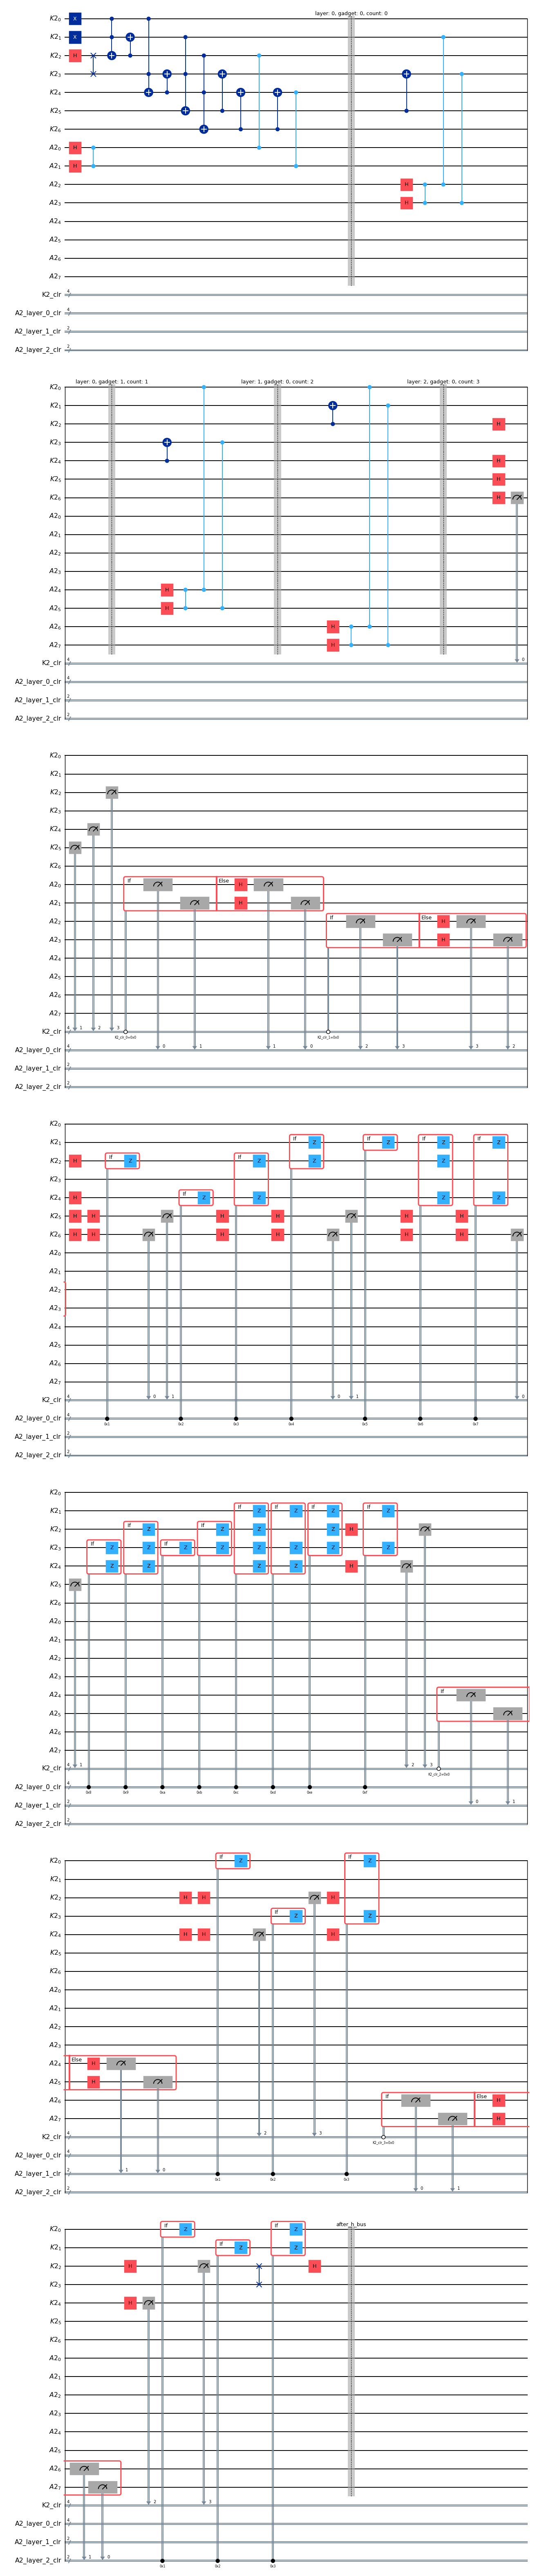

In [6]:
qc.draw('mpl', scale=0.7)